# TP Neural Networks for Regression
Polytech SI4

Diane Lingrand Diane.Lingrand@univ-cotedazur.fr

2024-2025

In [1]:
import numpy as np
import torch
import keras
import math
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation 
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

## Neural network as a function approximator

In this first part, your goal is to learn the following mathematical function from samples and using a neural network. The code provided in this section will help you to start. This code is running without errors but the quality of the result is poor. Your goal is to improve this code.

In [5]:
def myFunction(x):
    return 0.6+2*(x+2*(x*10)**2-(x*10)**3)*torch.exp(-x*10)

### generation of the dataset (samples from 'myFunction')

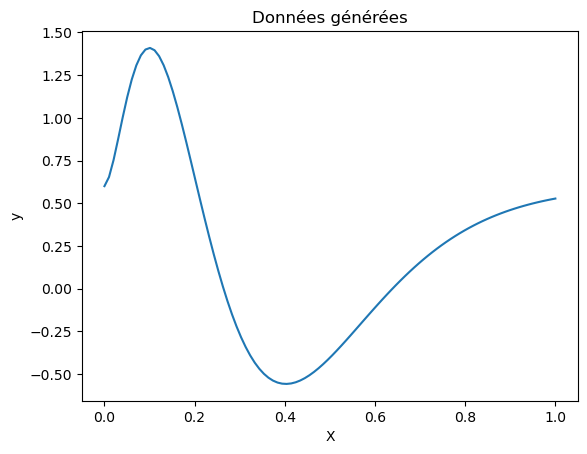

In [10]:
nbData = 100
X = torch.linspace(0,1, nbData)
y = myFunction(X)
plt.plot(X,y)
plt.title("Données générées")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

<font color="green"><b>Question:</b></font> Split the data set into train/test sets. Start using the same method as last week (split on indices).

In [18]:
train_split = int(nbData * 0.8)
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

print(f"Entraînement: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Test: X_test: {X_test.shape}, y_test: {y_test.shape}")

Entraînement: X_train: torch.Size([80]), y_train: torch.Size([80])
Test: X_test: torch.Size([20]), y_test: torch.Size([20])


<font color="green"><b>Question:</b></font> Plot the train and test sets using different colors

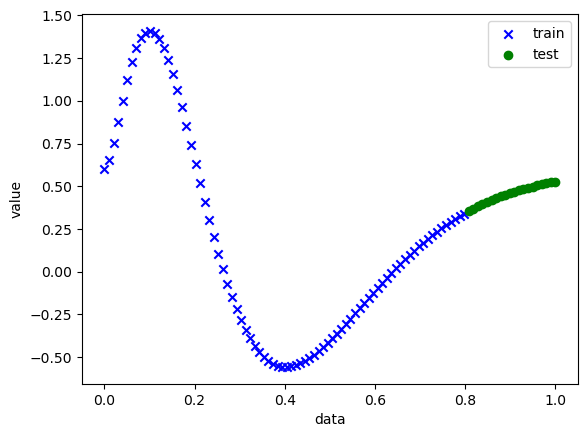

In [20]:
plt.scatter(X_train,y_train, marker='x', color='blue',label='train')
plt.scatter(X_test,y_test, marker='o', color='green', label='test')

plt.xlabel('data')
plt.ylabel('value')
plt.legend()

<font color="green"><b>Question:</b></font> You won't be able to learn all the parts of the curve using this train dataset and the test on the test set is non-sens. Two solutions: shuffle the dataset before splitting or use **sklearn.model_selection.train_test_split** that will perform the same operations. 

### Shuffled Data set

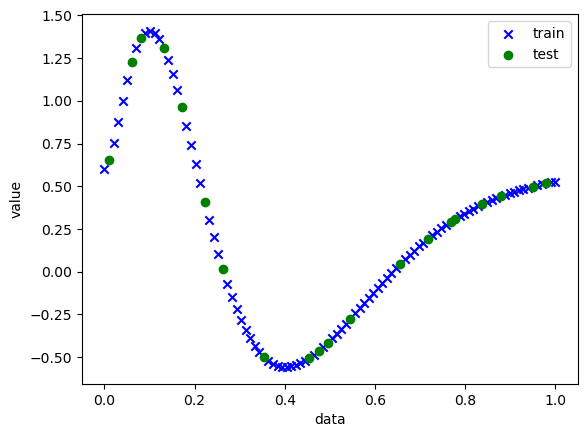

In [41]:
shuffledDataSet = torch.randperm(nbData) 
X = X[shuffledDataSet]
y = y[shuffledDataSet]

train_split = int(nbData * 0.8)
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

plt.scatter(X_train,y_train, marker='x', color='blue',label='train')
plt.scatter(X_test,y_test, marker='o', color='green', label='test')

plt.xlabel('data')
plt.ylabel('value')
plt.legend()

### Using train_test_split from sklearn

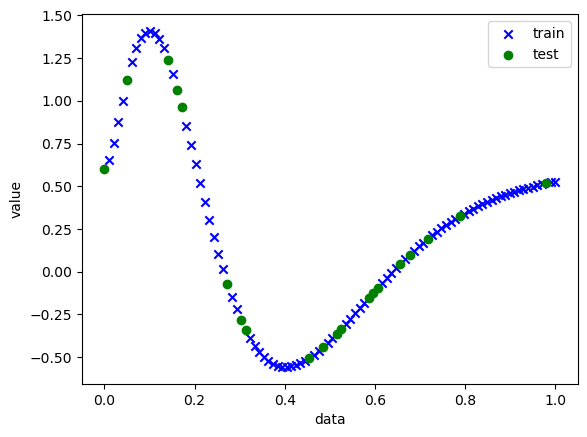

In [57]:
nbData = 100
X = torch.linspace(0, 1, nbData).unsqueeze(1)
y = myFunction(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

plt.scatter(X_train,y_train, marker='x', color='blue',label='train')
plt.scatter(X_test,y_test, marker='o', color='green', label='test')

plt.xlabel('data')
plt.ylabel('value')
plt.legend()

### 

### the neural network

In [61]:
#topology
model = Sequential()
model.add(keras.Input(shape=(1,)))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='mse')

<font color="green"><b>Question:</b></font> Display the architecture and the number of parameters you will have to learn (method 'summary').

In [63]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

<font color="green"><b>Question:</b></font> Learn 10 epochs using a batch size of 32

Epoch 1/2000
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3093 - val_loss: 0.3112
Epoch 2/2000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3161 - val_loss: 0.3105
Epoch 3/2000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3080 - val_loss: 0.3099
Epoch 4/2000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3017 - val_loss: 0.3095
Epoch 5/2000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3164 - val_loss: 0.3084
Epoch 6/2000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3072 - val_loss: 0.3070
Epoch 7/2000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3142 - val_loss: 0.3062
Epoch 8/2000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3103 - val_loss: 0.3053
Epoch 9/2000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3088 - val_loss: 0.3046
Epoch 10/2000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3095 - val_loss: 0.3037
Epoch 11/2000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3050 - val_loss: 0.3025
Epoch 12/2000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

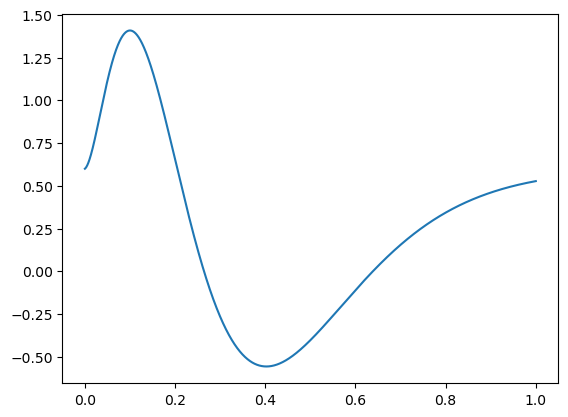

In [158]:
nbData = 10000
X = torch.linspace(0,1, nbData)
y = myFunction(X)
plt.plot(X,y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

model = Sequential()
model.add(keras.Input(shape=(1,)))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(1))
model.compile(optimizer='rmsprop',loss='mse')

ourCallback = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=20, verbose=0, mode='auto', baseline=None, restore_best_weights=True)

history=model.fit(X_train, y_train, epochs=2000, batch_size=128, validation_split=0.2, callbacks=[ourCallback])

<font color="green"><b>Question:</b></font> Plot the history. Are you satisfied with the convergence?

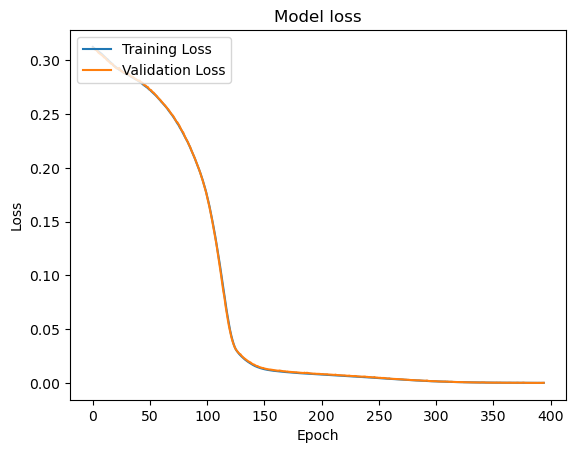

In [160]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.show()

<font color="green"><b>Question:</b></font> Compute and display the mse score (method 'evaluate'). Is it good?

In [162]:
yTrainPred = model.predict(X_train)
yTestPred = model.predict(X_test)
score = model.evaluate(X_test,y_test)
print("test score = %.2f" % (score))

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step - loss: 2.4491e-04
test score = 0.00


<font color="green"><b>Question:</b></font> It could be difficult to interpret this *mse* value. Instead, plot again the theoretical curve (the 'truth') along with the prediction for the train and the test sets (using different colors). Are you satisfied with the result?

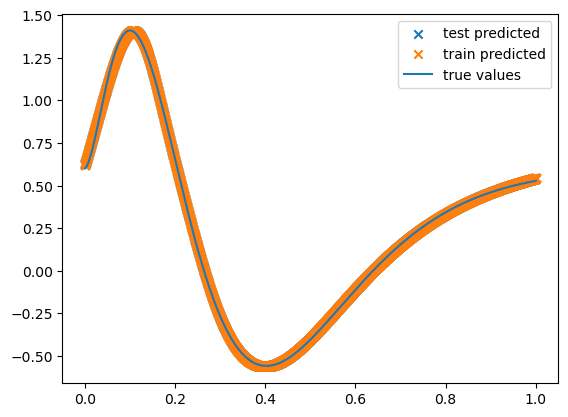

In [165]:
plt.scatter(X_test,yTestPred, marker='x', label='test predicted')
plt.scatter(X_train,yTrainPred, marker='x',label='train predicted')
plt.plot(X,y, label='true values')
plt.legend()

<font color="green"><b>Question:</b></font> Looking at this picture, you may see that both predictions from train or test are bad. This means that you have not learned the correct functions using your neural network.
You can improve this by answering to these questions:
- is the network adapted to your problem? Check carefully the entry and the output!
- do you have enough data ? too much ?
- is the topology of the neural network too simple ? too complex ? 
- are the parameters of the neural network well chosen ?
- did the network stop too early (not converged) or too late (overfitting)?

Maybe, you will have to change many hyper-parameters together.

In [168]:
# your work here

## Regression using a toy dataset: diabetes

In this section, you will use another dataset that you can load using the sklearn library: <a href='https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html'>Diabetes dataset</a>

In [174]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()  # could also use X, y = load_diabetes(return_X_y=True)
X = diabetes.data
y = diabetes.target
print(diabetes.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


<font color="green"><b>Question:</b></font> How many data? What is the dimension of the data? What do you need to predict? What is the range of values to be predicted? What is the range of input data?

In [177]:
print('There are ', len(y), ' data of dimension ' , X.shape[1])
print('Target values are in the range of [', min(y), ',', max(y), '] ')
print('Data values are in the range of :\n min are ', np.min(X, axis=0), '\n max are ', np.max(X, axis=0))

There are  442  data of dimension  10
Target values are in the range of [ 25.0 , 346.0 ] 
Data values are in the range of :
 min are  [-0.10722563 -0.04464164 -0.0902753  -0.1123988  -0.12678067 -0.11561307
 -0.10230705 -0.0763945  -0.12609712 -0.13776723] 
 max are  [0.11072668 0.05068012 0.17055523 0.13204362 0.15391371 0.19878799
 0.18117906 0.18523444 0.13359728 0.13561183]


<font color="green"><b>Question:</b></font> Build, learn and evaluate different neural networks and select the one that gives the best results. Start with simple models.

In [187]:
# CORRECTION

correctionMSE = (np.max(y)-np.min(y))**2

y = (y-min(y))/(np.max(y)-np.min(y))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

model = Sequential()
model.add(keras.Input(shape=(10,)))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(1))
model.compile(optimizer='rmsprop',loss='mse')
diabetes = load_diabetes()

ourCallback = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=20, verbose=0, mode='auto', baseline=None, restore_best_weights=True)

history=model.fit(X_train, y_train, epochs=2000, batch_size=128, validation_split=0.2, callbacks=[ourCallback])
# 18009 without output scaled into [0,1]

Epoch 1/2000
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step - loss: 0.4693 - val_loss: 0.5077
Epoch 2/2000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.4021 - val_loss: 0.4593
Epoch 3/2000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.3625 - val_loss: 0.4219
Epoch 4/2000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.3280 - val_loss: 0.3904
Epoch 5/2000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.3115 - val_loss: 0.3630
Epoch 6/2000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.2845 - val_loss: 0.3382
Epoch 7/2000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.2705 - val_loss: 0.3160
Epoch 8/2000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.2453 - val_loss: 0.2952
Epoch 9/2000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.2214 - val_loss: 0.2756
Epoch 10/2000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2133 - val_loss: 0.2577
Epoch 11/2000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1906 - val_loss: 0.2406
Epoch 12/2000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.

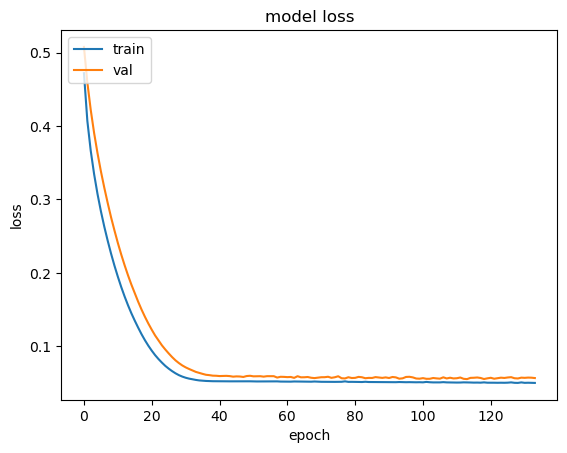

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0600 
test score = 0.06


In [188]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

score = model.evaluate(X_test,y_test)
print
print("test score = %.2f" % (score*correctionMSE))

<font color="green"><b>Question:</b></font> Experiment if <a href='https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler'>StandardScaler</a> could improve the results.

In [193]:
from sklearn.preprocessing import StandardScaler

In [220]:
scaler = StandardScaler()

y = (y-min(y))/(np.max(y)-np.min(y))
X_scaled = scaler.fit_transform(X)

correctionMSE = (np.max(y)-np.min(y))**2
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.4)

model = Sequential()
model.add(keras.Input(shape=(10,)))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(1))

model.compile(optimizer='rmsprop', loss='mse')

ourCallback = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=20, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=2000, batch_size=128, validation_split=0.2, callbacks=[ourCallback])

Epoch 1/2000
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - loss: 0.4755 - val_loss: 0.5017
Epoch 2/2000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.4264 - val_loss: 0.4586
Epoch 3/2000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.3898 - val_loss: 0.4250
Epoch 4/2000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.3556 - val_loss: 0.3963
Epoch 5/2000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.3298 - val_loss: 0.3710
Epoch 6/2000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.3081 - val_loss: 0.3481
Epoch 7/2000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.2880 - val_loss: 0.3272
Epoch 8/2000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2678 - val_loss: 0.3076
Epoch 9/2000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2612 - val_loss: 0.2897
Epoch 10/2000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.2438 - val_loss: 0.2730
Epoch 11/2000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.2201 - val_loss: 0.2567
Epoch 12/2000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.

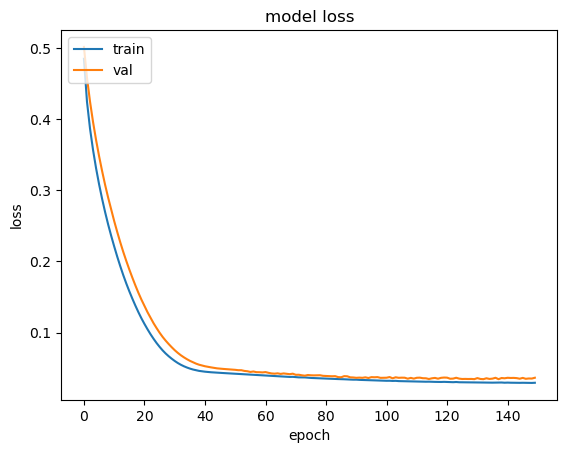

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step - loss: 0.0275
test score = 0.03


In [224]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

score = model.evaluate(X_test,y_test)
print("test score = %.2f" % (score*correctionMSE))